In [1]:
import sys
sys.path.append("..")

import Essentials

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [4]:
a = np.load('Data_Average.npz', allow_pickle=True)

In [5]:
x1 = a['X_test_1']
x2 = a['X_train_1']

y1 = a['Y_test_1']
y2 = a['Y_train_1']

In [6]:
timestamp1 = y1[:, 1]
timestamp2 = y2[:, 1]

y1 = y1[:, 0].reshape(len(y1), 1)
y1 = y1.astype(np.float64)
y2 = y2[:, 0].reshape(len(y2), 1)
y2 = y2.astype(np.float64)

C:\Users\PC\AppData\Local\Temp\ipykernel_9076\3146428066.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1 = y1.astype(np.float64)
C:\Users\PC\AppData\Local\Temp\ipykernel_9076\3146428066.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y2 = y2.astype(np.float64)


In [7]:
y1.shape

(74, 1)

In [8]:
x1.shape

(74, 98)

In [42]:
class TestSoftSensor(Essentials.SoftSensor):
    def __init__(self, x_train, y_train):
        super().__init__('Test')
        self.x_scaler = StandardScaler() 
        self.y_scaler = StandardScaler()
        self.x_scaler.fit(x_train)
        self.y_scaler.fit(y_train)
        self.train(x_train, y_train)

    def prepocessing(self, x):
        try:
            return self.x_scaler.transform(x)
        except:
            try:
               return self.y_scaler.transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err
            

    def postprocessing(self, x):
        try:
            return self.x_scaler.inverse_transform(x)
        except:
            try:
               return self.y_scaler.inverse_transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err

    def evaluate_model(self, x):
        preproc_x = self.prepocessing(x)
        predictions = self.get_model().predict(preproc_x)
        return predictions

    def train(self, x_train, y_train):
        model = LinearRegression()
        preproc_x = self.prepocessing(x_train)
        preproc_y = self.prepocessing(y_train)
        model.fit(preproc_x,preproc_y)
        self.set_model(model)

    def __str__(self):
        model = self.get_model()
        coefficients = model.coef_
        intercept = model.intercept_
        return (f"Линейная регрессия, коэффициенты: {coefficients}, "
                f"Интерсепт: {self.postprocessing(intercept.reshape(-1, 1))[0, 0]}")

In [43]:
Test_sensor_1 = TestSoftSensor(x2, y2)

In [44]:
print(Test_sensor_1)

Линейная регрессия, коэффициенты: [[ 0.3137575   0.18611091 -0.14722911 -0.10137461  0.04420037 -0.53565132
   0.04391461 -0.03133924 -0.38385685 -0.15024899 -0.39797301 -0.28720536
  -0.20706543  0.23783191 -0.36786796  0.35352292 -0.08000195  0.01834674
  -0.16087798  0.39081132  0.05223862  0.25000622 -0.03328127  0.17959523
   0.18048184 -0.0028636  -0.47008378  0.430954   -0.41333104  0.97447343
  -0.1151218  -0.13066925  0.14263782  0.21502953  0.13013467  0.32133184
  -0.2002551   0.19865264 -0.21171254  0.62190551 -0.19158178  0.2391295
   0.16661098 -0.58706234  0.69175244  0.09438131 -0.24109442 -0.45045215
  -0.42841731  0.1284568  -0.03851522 -0.76218934  0.50278088  0.28852457
  -0.12450194  0.14182576 -0.33800605  0.65840823  0.12493943 -0.61294151
  -0.36447768  0.00752081 -0.09085792  0.12940936  0.00185973  0.17695025
  -0.10299971 -0.42609976  0.1699502  -0.00245239 -0.13037951 -0.05702275
  -0.26062843 -0.0490003   0.1195258  -0.05240974 -0.25594044  0.31649772
   0.

In [45]:
metric = Essentials.R2Metric()

In [46]:
test_visual = Essentials.Visualizer(x1, y1, timestamp1, [metric], 'Test SoftSensor R2 metric')

      Coefficient of determination
Test                 -3.497701e+06


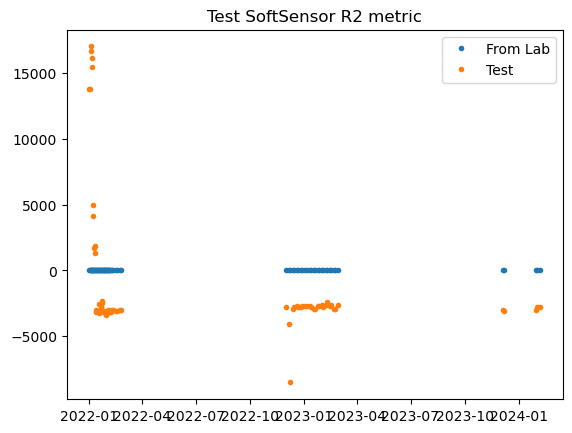

In [47]:
test_visual.visualize([Test_sensor_1])